In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

In [90]:
df = pd.read_csv('/content/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
df.shape

(1599, 12)

In [92]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [93]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [95]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

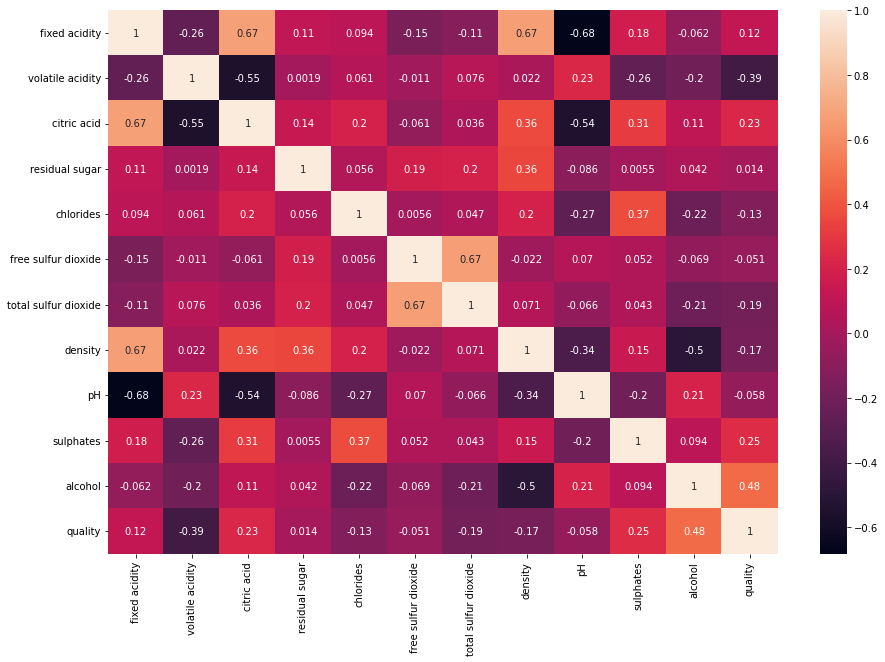

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

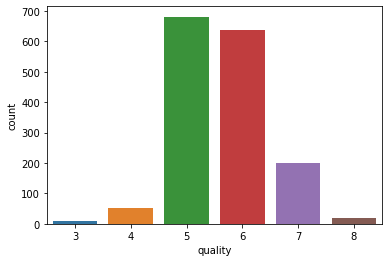

In [99]:
sns.countplot(x='quality',data=df)

In [102]:
x = df.drop('quality', axis=1)
y = df['quality']

In [109]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [104]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [107]:
x.shape, y.shape

((1599, 11), (1599,))

In [119]:
model= keras.Sequential()
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x, y, validation_split=0.25, epochs=150)

Epoch 1/150
38/38 [==============================] - 1s 8ms/step - loss: 4.3436 - accuracy: 0.3403 - val_loss: 2.4421 - val_accuracy: 0.3000
Epoch 2/150
38/38 [==============================] - 0s 3ms/step - loss: 1.7579 - accuracy: 0.4587 - val_loss: 1.6204 - val_accuracy: 0.4925
Epoch 3/150
38/38 [==============================] - 0s 3ms/step - loss: 1.4593 - accuracy: 0.4996 - val_loss: 1.4776 - val_accuracy: 0.4750
Epoch 4/150
38/38 [==============================] - 0s 3ms/step - loss: 1.3613 - accuracy: 0.5046 - val_loss: 1.3857 - val_accuracy: 0.4725
Epoch 5/150
38/38 [==============================] - 0s 3ms/step - loss: 1.2859 - accuracy: 0.5071 - val_loss: 1.3161 - val_accuracy: 0.4725
Epoch 6/150
38/38 [==============================] - 0s 3ms/step - loss: 1.2377 - accuracy: 0.5079 - val_loss: 1.2673 - val_accuracy: 0.4650
Epoch 7/150
38/38 [==============================] - 0s 3ms/step - loss: 1.2106 - accuracy: 0.4996 - val_loss: 1.2419 - val_accuracy: 0.4650
Epoch 8/150
3

In [120]:
 model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 11)                132       
                                                                 
 dense_20 (Dense)            (None, 10)                120       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________


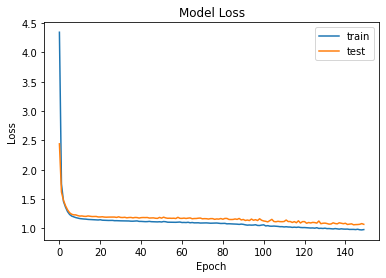

In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

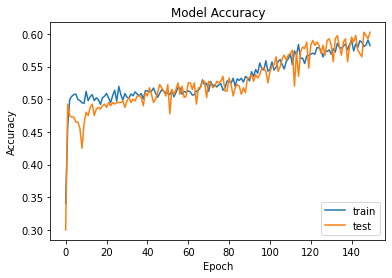

In [123]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

In [185]:
sample = df.sample(n=1)
x_pred = sample.drop('quality', axis=1)
y_true = sample['quality'].to_numpy().astype('int32')
y_pred = model.predict(x_pred)

print('Prediction Values From Sample: ', y_pred)
max = np.argmax(y_pred, axis=1)
print('Predicted Quality From Sample: ', max, '\nPrediction Accuracy: ',y_pred[0][max]*100/np.sum(y_pred),
      '%\nTrue Quality from Sample: ', y_true)

Prediction Values From Sample:  [[4.38374514e-07 2.17663751e-06 1.03002661e-04 3.71935498e-03
  6.75640395e-03 7.18000606e-02 4.98230904e-01 3.88148278e-01
  3.12392469e-02 1.13634314e-07]]
Predicted Quality From Sample:  [6] 
Prediction Accuracy:  [49.82309] %
True Quality from Sample:  [6]


In [175]:
model.save('multi_class_red_wine_model.h5')

In [176]:
del model

In [177]:
model = load_model('multi_class_red_wine_model.h5')

In [190]:
sample = df.sample(n=1)
x_pred = sample.drop('quality', axis=1)
y_true = sample['quality'].to_numpy().astype('int32')
y_pred = model.predict(x_pred)

print('Prediction Values From Sample: ', y_pred)
max = np.argmax(y_pred, axis=1)
print('Predicted Quality From Sample: ', max, '\nPrediction Accuracy: ',y_pred[0][max]*100/np.sum(y_pred),
      '%\nTrue Quality from Sample: ', y_true)

Prediction Values From Sample:  [[1.65698621e-09 1.32712143e-08 1.49589710e-06 1.63939944e-03
  1.11652203e-02 1.72116905e-01 5.91375172e-01 2.08580568e-01
  1.51212495e-02 1.51734264e-10]]
Predicted Quality From Sample:  [6] 
Prediction Accuracy:  [59.137516] %
True Quality from Sample:  [6]
